In [1]:
import requests # from urllib.request import urlopen
from bs4 import BeautifulSoup # HTTP Response -> HTML 

import pandas as pd

from datetime import datetime


from selenium import webdriver
import time 
import re #정규 표현식 활용

In [3]:
#망고플레이트에서 음식을 키워드로 맛집 리스트 가져오는 function
def get_rest_list(keyword):
    
    #페이지, 맛집리스트 초기화
    pagenum = 1
    restaurant_list = []
    
    #page별로 while 루프 돌려서 상호명 뽑아오기
    while pagenum <= 2: 
        try:
            url = 'https://www.mangoplate.com/search/?keyword='+keyword+'&page='+str(pagenum)#keyword를 input으로 망고플레이트 url 생성

            session = requests.Session()
            headers = {
            "User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_5) AppleWebKit 537.36 (KHTML, like Gecko) Chrome",
            "Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8"
            }
            html = session.get(url, headers=headers).content 
            source = BeautifulSoup(html, 'html.parser')

            restaurants = source.find_all('h2', {'class' : 'title'}) #h2태그의 class 'title' => 상호명

            for restaurant in restaurants:#텍스트 깔끔하게 처리 및 리스트에 상호명 추가 루프

                n_restaurant = re.sub('\s', '', restaurant.get_text()) #텍스트 중간에 빈칸 없애기
                restaurant_list.append(n_restaurant)#리스트에 상호명 추가
        except:
            print(pagenum,'페이지 까지의 결과입니다.')
        
        pagenum += 1
        
    return restaurant_list #keyword 관련 맛집 리스트 생성

In [4]:
cnoodlelist = get_rest_list('냉면') #냉면 맛집 리스트 생성

In [5]:
cnoodlelist

['허브족발(본점)',
 '윤밀원',
 '김진목삼',
 '진미평양냉면',
 '을지면옥',
 '서관면옥',
 '광릉한옥집',
 '광화문국밥',
 '춘향미엔',
 '우래옥(을지로점)',
 '설눈',
 '봉밀가',
 '봉피양(방이점)',
 '미엔아이',
 '윤선희의평양냉면양각도',
 '청기와타운',
 '서평면옥',
 '몽탄',
 '정인면옥',
 '오장동흥남집(본점)',
 '거대갈비',
 '평안도상원냉면',
 '명지원이동갈비',
 '벽제갈비(신촌점)',
 '공단떡볶이',
 '고명집',
 '우밀면옥',
 '단천식당',
 '명인등심(압구정점)',
 '평남면옥',
 '서정가야밀면',
 '더진미평냉',
 '명인등심(삼성직영점)',
 '영동냉면',
 '을밀대(본점)',
 '능라도(강남점)',
 '능라도(분당점)',
 '강서면옥',
 '옥돌현옥',
 '진남포면옥']

In [6]:
currylist = get_rest_list('카레')

In [7]:
currylist

['마루심',
 '우미노미',
 '카레',
 '공기식당',
 '요시즈카우나기야/吉塚うなぎ屋',
 '마루심(마포점)',
 '멘야하나비(신사점)',
 '예티',
 '고옥',
 '홋카이도부타동스미레',
 '데카망(휴업중)',
 '요우란',
 '온정',
 '타이가텐푸라',
 '오사카카레콘유',
 '텐동요츠야',
 '멘야하나비',
 '깔리',
 '우마텐',
 '부타이',
 '에베레스트(동대문점)',
 '가츠오',
 '교양식사',
 '도요스6가',
 '텐동한',
 '현우동',
 '라하노카레',
 '포탈라(종로점)',
 '후라토식당(아브뉴프랑판교점)',
 '운멜로랩',
 '이치젠(망원본점)',
 'BARN110',
 '후라토식당',
 '오복수산(도산점)',
 '우동카덴(연희점)',
 '멘야코노하카레',
 '사쿠텐',
 '이코이',
 '스아게/すあげ',
 '주간소바식당산']

In [8]:
 url = 'https://www.mangoplate.com/search/?keyword='+'마루심' #상호명으로 망고플레이트 검색 url

session = requests.Session()
headers = {
"User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_5) AppleWebKit 537.36 (KHTML, like Gecko) Chrome",
"Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8"
}
html = session.get(url, headers=headers).content 
source = BeautifulSoup(html, 'html.parser')

rest_code = source.find('div',{'class':'list-restaurant-item'}).find('a')['href']
rest_code

'/restaurants/KU-4QO6Yvt'

In [9]:
for rest in currylist:
    get_mango_info(rest)
    print(rest,'의 정보 획득!')

NameError: name 'get_mango_info' is not defined

In [10]:
def get_mango_info(restaurant):#상호명을 input으로 관련 정보 받아오는 function

    mango_info = {} #빈 dict 생성

    url = 'https://www.mangoplate.com/search/'+restaurant #상호명으로 망고플레이트 검색 url

    session = requests.Session()
    headers = {
    "User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_5) AppleWebKit 537.36 (KHTML, like Gecko) Chrome",
    "Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8"
    }
    html = session.get(url, headers=headers).content 
    source = BeautifulSoup(html, 'html.parser')
    
    try:
        rest_code = source.find('div',{'class':'list-restaurant-item'}).find('a')['href']#검색결과에서 첫번째 결과의 고유 코드 따오기 
        newurl = 'https://www.mangoplate.com'+rest_code #고유 코드 활용한 url 주소 생성
        newhtml = session.get(newurl, headers=headers).content 
        newsource = BeautifulSoup(newhtml, 'html.parser')

        rate = float(re.sub('\s','',newsource.find('strong',{'class':'rate-point'}).get_text()))#평점이 속한 태그에서 텍스트 가져와 float로 바꾸기 (나중에 계산 용이)

        rest_table = newsource.find('table',{'class':'info'})#관련 정보가 있는 테이블 경로

        address = rest_table.find_all('td')[0].find_all('span')[1].get_text()#주소
        phone = rest_table.find_all('td')[1].get_text()#전화번호
        kind = re.sub('\s','',rest_table.find_all('td')[2].get_text())#음식 종류(정규표현식 활용하여 깔끔하게 정리)
        price = rest_table.find_all('td')[3].get_text()#가격대

        #각각의 정보를 만든 dict의 key값의 value로 추가
        mango_info['name'] = restaurant
        mango_info['rate'] = rate
        mango_info['address'] = address
        mango_info['phone'] = phone
        mango_info['kind'] = kind
        mango_info['price'] = price
        
    except:
        mango_info['name'] = restaurant
        mango_info['rate'] = 'N/A'
        mango_info['address'] = 'N/A'
        mango_info['phone'] = 'N/A'
        mango_info['kind'] = 'N/A'
        mango_info['price'] = 'N/A'
    
    return mango_info #하나의 dict를 최종 값으로 return



In [11]:
print(get_mango_info('윤밀원'))

{'name': '윤밀원', 'rate': 4.6, 'address': '경기도 성남시 분당구 정자동 223-9', 'phone': '031-714-8388', 'kind': '국수/면요리', 'price': '만원 미만'}


In [12]:
def get_naver_info(restaurant): #네이버 평점 및 리뷰 가져오기
    
    naver_info = {}
    
    #정규표현식 활용해 상호명에 있는 괄호 및 특수문자 제거
    regex = "\(.*\)|\s-\s.*" 
    query = re.sub(regex, '', restaurant)
    
    url = "https://search.naver.com/search.naver?where=nexearch&sm=tab_jum&query=" + query
    web = requests.get(url).content
    source = BeautifulSoup(web, 'html.parser')
    
    try:
        reviewcount = int(source.find_all('span', {'class': 'count'})[1].get_text())
        rate = float(source.find_all('div', {'class': 'star_area'})[0].find('em').get_text())
    except:
        reviewcount = 'N/A'
        rate = 'N/A'
    
    naver_info['reviewcount'] = reviewcount
    naver_info['rate'] = rate
    
    return naver_info


    

In [13]:
print(get_naver_info('윤밀원'))

{'reviewcount': 'N/A', 'rate': 'N/A'}


In [14]:
def get_dining_info(restaurant): #다이닝코드 평점/별점/리뷰 가져오기
    
    dining_info = {}
    review_list = []
    
    #정규표현식 활용해 상호명에 있는 괄호 및 특수문자 제거
    regex = "\(.*\)|\s-\s.*"
    query = re.sub(regex, '', restaurant)
    
    url = 'https://www.diningcode.com/isearch.php?query=' + query
    web = requests.get(url).content
    source = BeautifulSoup(web, 'html.parser')
    
    #다이닝코드에 해당 식당이 없는 경우를 예상하여 try/except로 error 발생 시 'N/A'로 데이터 대체
    try:
        ul_tag = source.find('div', {'id':'div_rn'})
        li_tag = ul_tag.find('li')
        a_tag = li_tag.find('a')
        target_url = 'https://www.diningcode.com' + a_tag.attrs['href']
        target_url

        web_review = requests.get(target_url).content
        source_review = BeautifulSoup(web_review, 'html.parser')

        #평균 평점 꺼내기
        p_tag = source_review.find('p', {'class':'grade'})
        # p_tag
        review_point = int(p_tag.find('strong').get_text().replace('점',''))

        #평균 별점 꺼내기
        star_point = source_review.find('p', {'id':'lbl_star_point'}).get_text()
        star_point = star_point.replace("\n", "")
        star_point = float(star_point.replace('점',''))# 교체하다

        reviews = source_review.find_all('p',{'class':'review_contents btxt'})

        for review in reviews:
            review_list.append(re.sub('\n','',review.get_text()))

        dining_info['review_point'] = review_point
        dining_info['star_point'] = star_point
        dining_info['review'] = review_list
                               
    except:
        dining_info['review_point'] = 'N/A'
        dining_info['star_point'] = 'N/A'
        dining_info['review'] = 'N/A'
        
    return dining_info

In [15]:
print(get_dining_info('윤밀원'))

{'review_point': 67, 'star_point': 4.7, 'review': ['한글날 딸들을 데리고 분당 정자동 윤밀원으로  평양냉면 양곰탕 양지국수를 주문 평양냉면 면발 매밀함량 굿 식감 굿 육수는 동치미맛이 짙음 양지국수 먹어보지 못했던 특색있는 깊고 칼칼한 맛 굿 양 곰탕은 고기냄새는잘 잡았으나 국물은 그다지 깨끗하게 개운하지 못했음 다음엔 족발을 꼭 먹어봐야겠다 주택가에 위치해 가로수들이 단풍이들어 가을 정취를 도심에서 느낄수있어 더더욱 좋았던 가족나들이였습니다', '족발은 요즘 유행하는 스타일이고 제공되는 고수와 소스등으로 깔끔함. 평양냉면 역시 입문자가 먹어도 무난한 맛. 칼국수는 개인적으로 별로였습니다. 대기가 길지만 일단 입장하면 음식도 빨리 나오고 서비스도 좋아서 기분 좋게 식사 가능합니다. 주차는 근처 공영 주차장 추천합니다.', '첫번째 사진 : 양지칼국수두번째 사진 : 막국수세번째 사진 : 냉면칼국수 종류(양지칼국수, 칼국수)는 흰국물과 빨간국물 두가지 종류가 있다고 한다. 양지칼국수 흰국물로 시켰는데 순하고 담백한 맛이었다.막국수는 막국수보단 비빔냉면 같은 느낌이었다. 자극적이지 않으며 얘 또한 순하고 단백한 맛이었다.냉면은 평양냉면 스타일같고, 순한 맛이었다.총평 : 멀리갈게 아니라면 아주 괜찮은 선택지가 될거같다. 재방문의사 있음.양이 상당히 많다. 대식가가 아니라면 인원수보다 적게 시키는데 좋을거같으며, 족발을 시키는 경우에는 더 적게 시켜도 될거 같다. 전체적으로 고급지고 단백하고 순한 맛으로 어른들이 좋아할것 같고, 아이들도 칼국수와 막국수는 좋아할것 같다. 메뉴가 전체적으로 순한맛이라 막국수도 자극적이지 않아서 어린 아이들이 먹기 좋을거같다. 재방문의사 있음.', '근처에 공영 주차장이 있어서 거기에 차 대시면 됩니다. 막국수가 진짜 부드럽게 녹아요. 맛있어요. 족발도 잡내 없고 정말 맛있네요.', '나이와 상관없이 맛난 음식을 즐길수있는 행복한 장소']}


In [16]:
#음식을 키워드로 해당 음식 맛집리스트를 뽑아오는 function
def get_restaurant_data(menu):
    
    #만들어놓은 get_rest_list function으로 상호명 리스트 생성
    restaurant_list = get_rest_list(menu)
    print(len(restaurant_list),'개의 식당 검색 완료.')
    
    #DataFrame을 위한 빈 리스트 생성

    mango_name = []
    mango_rate = []
    mango_address = []
    mango_phone = []
    mango_kind = []
    mango_price = []
    naver_reviewcount = []
    naver_rate = []
    dining_review_point = []
    dining_star_point = []
    dining_review = []
    count = 1

    #상호명 리스트를 활용하여 각각의 점포의 정보를 망고플레이트, 네이버, 다이닝코드로 부터 받아오는 for loop
    for restaurant in restaurant_list:

        mango_info = get_mango_info(restaurant)
        naver_info = get_naver_info(restaurant)
        dining_info = get_dining_info(restaurant)
        #위에서 정의한 망고플레이트 음식점 정보를 하나의 dict로 가져옴

        #각각의 리스트에 고유 정보 추가
        mango_name.append(mango_info['name'])
        mango_rate.append(mango_info['rate'])
        mango_address.append(mango_info['address'])
        mango_phone.append(mango_info['phone'])
        mango_kind.append(mango_info['kind'])
        mango_price.append(mango_info['price'])
        naver_reviewcount.append(naver_info['reviewcount'])
        naver_rate.append(naver_info['rate'])
        dining_review_point.append(dining_info['review_point'])
        dining_star_point.append(dining_info['star_point'])
        dining_review.append(dining_info['review'])
        
        print(count,'번째 식당 정보 수집중...')
        count += 1
    
    #생성된 리스트로 pandas dataframe 생성
    restaurant_df = pd.DataFrame({'음식점':mango_name,
                         '망고평점': mango_rate,
                         '네이버평점': naver_rate,
                         '네이버리뷰수': naver_reviewcount,
                         '다이닝코드평점': dining_review_point,
                         '다이닝코드별점': dining_star_point,
                         '다이닝코드리뷰': dining_review,     
                         '주소': mango_address,
                         '전화': mango_phone,
                         '종류': mango_kind,
                         '가격': mango_price})
    
    #완성된 DataFrame으로 excel파일 생성
    restaurant_df.to_excel('{}맛집리스트_{}.xlsx'.format(menu,datetime.now().strftime('%y%m%d_%H%M')), index=False, encoding='utf-8')
    print(menu,'맛집리스트가 완성되었습니다.')
    print(restaurant_df.head())
    
    #완성된 Dataframe을 return
    return restaurant_df
    

In [17]:
get_restaurant_data('돈까스')

40 개의 식당 검색 완료.
1 번째 식당 정보 수집중...
2 번째 식당 정보 수집중...
3 번째 식당 정보 수집중...
4 번째 식당 정보 수집중...
5 번째 식당 정보 수집중...
6 번째 식당 정보 수집중...
7 번째 식당 정보 수집중...
8 번째 식당 정보 수집중...
9 번째 식당 정보 수집중...
10 번째 식당 정보 수집중...
11 번째 식당 정보 수집중...
12 번째 식당 정보 수집중...
13 번째 식당 정보 수집중...
14 번째 식당 정보 수집중...
15 번째 식당 정보 수집중...
16 번째 식당 정보 수집중...
17 번째 식당 정보 수집중...
18 번째 식당 정보 수집중...
19 번째 식당 정보 수집중...
20 번째 식당 정보 수집중...
21 번째 식당 정보 수집중...
22 번째 식당 정보 수집중...
23 번째 식당 정보 수집중...
24 번째 식당 정보 수집중...
25 번째 식당 정보 수집중...
26 번째 식당 정보 수집중...
27 번째 식당 정보 수집중...
28 번째 식당 정보 수집중...
29 번째 식당 정보 수집중...
30 번째 식당 정보 수집중...
31 번째 식당 정보 수집중...
32 번째 식당 정보 수집중...
33 번째 식당 정보 수집중...
34 번째 식당 정보 수집중...
35 번째 식당 정보 수집중...
36 번째 식당 정보 수집중...
37 번째 식당 정보 수집중...
38 번째 식당 정보 수집중...
39 번째 식당 정보 수집중...
40 번째 식당 정보 수집중...
돈까스 맛집리스트가 완성되었습니다.
                음식점  망고평점 네이버평점 네이버리뷰수 다이닝코드평점 다이닝코드별점  \
0              시키카츠   4.7   N/A    N/A     N/A     N/A   
1              카와카츠   4.6  4.43    425      60     4.4   
2               오제제   4.6   N/A    N/A 

,음식점,망고평점,네이버평점,네이버리뷰수,다이닝코드평점,다이닝코드별점,다이닝코드리뷰,주소,전화,종류,가격
0,시키카츠,4.7,N/A,N/A,N/A,N/A,N/A,서울시 동대문구 회기동 60-147,02-6081-8753,까스요리,만원-2만원
1,카와카츠,4.6,4.43,425,60,4.4,[◈ 맛집기록 #9 '카와카츠'(5.0점 / 5점 만점)- 유명한 프리미엄 돈가스집...,서울시 마포구 서교동 465-1 1F 102호,070-8801-2053,까스요리,만원-2만원
2,오제제,4.6,N/A,N/A,43,4.6,[최근 몇년간 먹은 중에 우동과 돈까스를 가장 맛있게 먹은 곳. 가격이 별로 신경쓰...,서울시 용산구 동자동 43-22 1F,070-4647-4650,라멘/소바/우동,만원 미만
3,카츠바이콘반,4.5,N/A,N/A,59,4.9,[11시 30분 오픈! 토요일이어서그런지 11시 전부터 대기 4팀이나 있드라구요. ...,서울시 강남구 신사동 647-22,02-547-3903,까스요리,만원-2만원
4,후니도니(르메이에르종로타운점),4.5,N/A,N/A,59,4.5,[유명한이유가 있어요 치즈돈까스와 모밀이 단짠단짠마냥 맛있게느끼하고 개운하고 바삭하...,서울시 종로구 종로1가 24 르메이에르종로타운 B1,02-722-5402,까스요리,만원 미만
5,시키카츠,4.7,N/A,N/A,N/A,N/A,N/A,서울시 동대문구 회기동 60-147,02-6081-8753,까스요리,만원-2만원
6,드림카츠,4.5,N/A,N/A,N/A,N/A,N/A,경기도 안양시 만안구 안양동 873-170 1F,010-4016-0727,까스요리,만원-2만원
7,크레이지카츠,4.4,4.55,849,75,4.1,[웨이팅이 항상 심한걸 봤기 때문에 오후 4시에 대기자 순번을 적을 때 시간맞춰 갔...,서울시 마포구 합정동 391-5 1F,070-8621-7219,까스요리,만원 미만
8,정돈프리미엄,4.4,N/A,N/A,61,4.1,['프리미엄이라는 타이틀을 유지한다는 것'2세대 프리미엄 돈까스의 선두 주자 중 하...,서울시 강남구 신사동 519-4,02-549-0924,까스요리,2만원-3만원
9,망원동즉석우동,4.4,N/A,N/A,70,3.9,[아주매운맛 어묵우동 양념장이 잘 숙성된 막연히 매운맛이 아니라 부드럽게 뭉근히 오...,서울시 마포구 망원동 386-4,02-336-1330,라멘/소바/우동,만원 미만


In [18]:
get_restaurant_data('카레')

40 개의 식당 검색 완료.
1 번째 식당 정보 수집중...
2 번째 식당 정보 수집중...
3 번째 식당 정보 수집중...
4 번째 식당 정보 수집중...
5 번째 식당 정보 수집중...
6 번째 식당 정보 수집중...
7 번째 식당 정보 수집중...
8 번째 식당 정보 수집중...
9 번째 식당 정보 수집중...
10 번째 식당 정보 수집중...
11 번째 식당 정보 수집중...
12 번째 식당 정보 수집중...
13 번째 식당 정보 수집중...
14 번째 식당 정보 수집중...
15 번째 식당 정보 수집중...
16 번째 식당 정보 수집중...
17 번째 식당 정보 수집중...
18 번째 식당 정보 수집중...
19 번째 식당 정보 수집중...
20 번째 식당 정보 수집중...
21 번째 식당 정보 수집중...
22 번째 식당 정보 수집중...
23 번째 식당 정보 수집중...
24 번째 식당 정보 수집중...
25 번째 식당 정보 수집중...
26 번째 식당 정보 수집중...
27 번째 식당 정보 수집중...
28 번째 식당 정보 수집중...
29 번째 식당 정보 수집중...
30 번째 식당 정보 수집중...
31 번째 식당 정보 수집중...
32 번째 식당 정보 수집중...
33 번째 식당 정보 수집중...
34 번째 식당 정보 수집중...
35 번째 식당 정보 수집중...
36 번째 식당 정보 수집중...
37 번째 식당 정보 수집중...
38 번째 식당 정보 수집중...
39 번째 식당 정보 수집중...
40 번째 식당 정보 수집중...
카레 맛집리스트가 완성되었습니다.
               음식점 망고평점 네이버평점 네이버리뷰수 다이닝코드평점 다이닝코드별점  \
0              마루심  4.7   4.4    776      73     4.1   
1             우미노미  4.7   N/A    N/A      52     4.6   
2               카레  4.7   N/A    N/A      34  

,음식점,망고평점,네이버평점,네이버리뷰수,다이닝코드평점,다이닝코드별점,다이닝코드리뷰,주소,전화,종류,가격
0,마루심,4.7,4.4,776,73,4.1,[장어덮밥이 정말 맛있습니다. 정갈한 나고야식 덮밥입니다. 배부르게 점심을 먹고 싶...,서울시 서초구 반포동 54-10 청구빌딩,02-592-8998,돈부리/일본카레/벤토,3만원-4만원
1,우미노미,4.7,N/A,N/A,52,4.6,[고된 일하고 나서 내가 내자신에게 정말 성대한 식사를 제공하고 싶을때 방문하는 집...,서울시 영등포구 당산동4가 31-2 신우빌딩 1F,070-4367-7116,돈부리/일본카레/벤토,만원-2만원
2,카레,4.7,N/A,N/A,34,4.3,[12시 오픈인데 들어가려면 일단 11시 반 즈음부터 줄을 서야 맛볼 수가 있는 곳...,서울시 서초구 반포동 54-10 청구빌딩,02-592-8998,돈부리/일본카레/벤토,3만원-4만원
3,공기식당,4.5,N/A,N/A,60,3.6,[서촌에 위치한 카레 전문점 공기식당입니다. 대표 메뉴인 새우버터카레와 새우키마커리...,서울시 종로구 통인동 46-5 1F,010-4750-0930,돈부리/일본카레/벤토,만원 미만
4,요시즈카우나기야/吉塚うなぎ屋,N/A,N/A,N/A,25,5,[장어덮밥 먹으러 가는 곳! 히쯔마부시보다 우나쥬가 장어양이 더 많긴 하지만 오차즈...,N/A,N/A,N/A,N/A
5,마루심(마포점),4.5,4.4,776,73,4.1,[장어덮밥이 정말 맛있습니다. 정갈한 나고야식 덮밥입니다. 배부르게 점심을 먹고 싶...,서울시 마포구 용강동 51-3 성진빌딩 1F,02-711-1378,돈부리/일본카레/벤토,3만원-4만원
6,멘야하나비(신사점),4.4,4.51,285,78,4.1,[진짜 지금까지 먹었던 맛집 중에 최고였음 (별 5개가 부족할 정도) 소바 처음 먹...,서울시 서초구 잠원동 10-44,070-8847-7788,라멘/소바/우동,만원-2만원
7,예티,4.4,N/A,N/A,41,4.2,[회식으로 방문해봤다커리를 다양하게 먹어보고싶었는데 인도분이 말을 잘못이해하셔서 양...,서울시 마포구 서교동 360-22 2F,02-325-0745,인도음식,만원-2만원
8,고옥,4.4,N/A,N/A,75,4.4,[깔끔한 히츠마부시 장어덮밥집입니다 큰게 양이 많고 좋고 브레이크타임 있습니다. 인...,부산시 수영구 남천동 12-8,051-622-1638,돈부리/일본카레/벤토,2만원-3만원
9,홋카이도부타동스미레,4.4,N/A,N/A,38,5,[먹고 감동받은 부타동집입니다. 신촌에 위치한 작은 가게이고 ㄷ자 테이블로 되어있어...,서울시 서대문구 창천동 5-32,\n돈부리 / 일본 카레 / 벤토\n,만원-2만원,주차공간없음


In [19]:
get_restaurant_data('삼겹살')

40 개의 식당 검색 완료.
1 번째 식당 정보 수집중...
2 번째 식당 정보 수집중...
3 번째 식당 정보 수집중...
4 번째 식당 정보 수집중...
5 번째 식당 정보 수집중...
6 번째 식당 정보 수집중...
7 번째 식당 정보 수집중...
8 번째 식당 정보 수집중...
9 번째 식당 정보 수집중...
10 번째 식당 정보 수집중...
11 번째 식당 정보 수집중...
12 번째 식당 정보 수집중...
13 번째 식당 정보 수집중...
14 번째 식당 정보 수집중...
15 번째 식당 정보 수집중...
16 번째 식당 정보 수집중...
17 번째 식당 정보 수집중...
18 번째 식당 정보 수집중...
19 번째 식당 정보 수집중...
20 번째 식당 정보 수집중...
21 번째 식당 정보 수집중...
22 번째 식당 정보 수집중...
23 번째 식당 정보 수집중...
24 번째 식당 정보 수집중...
25 번째 식당 정보 수집중...
26 번째 식당 정보 수집중...
27 번째 식당 정보 수집중...
28 번째 식당 정보 수집중...
29 번째 식당 정보 수집중...
30 번째 식당 정보 수집중...
31 번째 식당 정보 수집중...
32 번째 식당 정보 수집중...
33 번째 식당 정보 수집중...
34 번째 식당 정보 수집중...
35 번째 식당 정보 수집중...
36 번째 식당 정보 수집중...
37 번째 식당 정보 수집중...
38 번째 식당 정보 수집중...
39 번째 식당 정보 수집중...
40 번째 식당 정보 수집중...
삼겹살 맛집리스트가 완성되었습니다.
         음식점  망고평점 네이버평점 네이버리뷰수 다이닝코드평점 다이닝코드별점  \
0         길목   4.6   N/A    N/A      62       4   
1       김진목삼   4.6  4.69    248      55     4.9   
2  육전식당(4호점)   4.5  4.39    739      76     4.2   
3       한

,음식점,망고평점,네이버평점,네이버리뷰수,다이닝코드평점,다이닝코드별점,다이닝코드리뷰,주소,전화,종류,가격
0,길목,4.6,N/A,N/A,62,4,[예쁘장한 삼겹살집이라고 정의하고 싶네요. 실내가 아기자기합니다. 여성분들만의 모임...,서울시 강남구 삼성동 58-6,02-518-9710,고기요리,만원-2만원
1,김진목삼,4.6,4.69,248,55,4.9,[주차할 수 없는 서촌 골목에 위치. 1호점과 2호점이 아주 가깝게 붙어있는데 두 ...,서울시 종로구 필운동 154,02-929-2929,고기요리,만원-2만원
2,육전식당(4호점),4.5,4.39,739,76,4.2,[이 정도 돼지고기면 옷에 냄새 다 배겨도 인정이다. 청계천 나들이 필수 코스라고 ...,서울시 강남구 역삼동 823-10 신도빌딩 1F,02-3452-6373,고기요리,2만원-3만원
3,한림돈가,4.4,N/A,N/A,64,4.1,[칼집 넣고 초벌한 삼겹살이 달달하니 맛나요. 메뉴 중 삼겹살 특히 추천. 고사리와...,서울시 서대문구 창천동 52-124 1F,02-338-6604,고기요리,만원-2만원
4,육전식당(1호점),4.4,4.39,739,76,4.2,[이 정도 돼지고기면 옷에 냄새 다 배겨도 인정이다. 청계천 나들이 필수 코스라고 ...,서울시 동대문구 신설동 104-3,02-2253-6373,고기요리,만원-2만원
5,꿉당,4.4,4.5,320,41,4,[#주님이먹여살려주시는인생 #꿉당⠀핫하다던 돼지고기집 솔직후기 = 약간 아쉽다.──...,서울시 서초구 잠원동 12-21 1F,02-545-9600,고기요리,만원-2만원
6,남영돈,4.4,N/A,N/A,61,4.5,"[시작은 기분좋게 웨이팅 등록. 하지만 기다림은 너무너무 지치고, 슬슬 열받다가, ...",서울시 용산구 남영동 52-2,02-793-3598,고기요리,만원-2만원
7,홋카이도부타동스미레,4.4,N/A,N/A,38,5,[먹고 감동받은 부타동집입니다. 신촌에 위치한 작은 가게이고 ㄷ자 테이블로 되어있어...,서울시 서대문구 창천동 5-32,\n돈부리 / 일본 카레 / 벤토\n,만원-2만원,주차공간없음
8,숙성도,4.8,N/A,N/A,60,4.4,[이곳이 아직 안올라와있다는게 신기할정도네요.. 돈사돈 칠돈가 등 가봤지만 여기만큼...,서울시 강남구 신사동 664-24 1F,070-7809-4769,이자카야/오뎅/꼬치,2만원-3만원
9,일품생고기,4.4,N/A,N/A,N/A,N/A,N/A,서울시 성동구 옥수동 384,02-2295-6566,고기요리,4만원 이상


In [20]:
donkatsu_df = get_restaurant_data('돈까스')

40 개의 식당 검색 완료.
1 번째 식당 정보 수집중...
2 번째 식당 정보 수집중...
3 번째 식당 정보 수집중...
4 번째 식당 정보 수집중...
5 번째 식당 정보 수집중...
6 번째 식당 정보 수집중...
7 번째 식당 정보 수집중...
8 번째 식당 정보 수집중...
9 번째 식당 정보 수집중...
10 번째 식당 정보 수집중...
11 번째 식당 정보 수집중...
12 번째 식당 정보 수집중...
13 번째 식당 정보 수집중...
14 번째 식당 정보 수집중...
15 번째 식당 정보 수집중...
16 번째 식당 정보 수집중...
17 번째 식당 정보 수집중...
18 번째 식당 정보 수집중...
19 번째 식당 정보 수집중...
20 번째 식당 정보 수집중...
21 번째 식당 정보 수집중...
22 번째 식당 정보 수집중...
23 번째 식당 정보 수집중...
24 번째 식당 정보 수집중...
25 번째 식당 정보 수집중...
26 번째 식당 정보 수집중...
27 번째 식당 정보 수집중...
28 번째 식당 정보 수집중...
29 번째 식당 정보 수집중...
30 번째 식당 정보 수집중...
31 번째 식당 정보 수집중...
32 번째 식당 정보 수집중...
33 번째 식당 정보 수집중...
34 번째 식당 정보 수집중...
35 번째 식당 정보 수집중...
36 번째 식당 정보 수집중...
37 번째 식당 정보 수집중...
38 번째 식당 정보 수집중...
39 번째 식당 정보 수집중...
40 번째 식당 정보 수집중...
돈까스 맛집리스트가 완성되었습니다.
                음식점  망고평점 네이버평점 네이버리뷰수 다이닝코드평점 다이닝코드별점  \
0              시키카츠   4.7   N/A    N/A     N/A     N/A   
1              카와카츠   4.6  4.43    425      60     4.4   
2               오제제   4.6   N/A    N/A 

In [2]:
from konlpy.tag import Twitter

twitter = Twitter()
malist = twitter.pos("아버지 가방에 들어가신다.", norm=True, stem=True)
print(malist)

C:\Users\James\Anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


[('아버지', 'Noun'), ('가방', 'Noun'), ('에', 'Josa'), ('들어가다', 'Verb'), ('.', 'Punctuation')]


In [3]:
import numpy as np
# import pandas as pd

In [4]:
df = pd.read_excel('돈까스맛집리스트_210620_1728.xlsx', encoding='utf-8')
df.head()

,음식점,망고평점,네이버평점,네이버리뷰수,다이닝코드평점,다이닝코드별점,다이닝코드리뷰,주소,전화,종류,가격
0,시키카츠,4.7,NaN,NaN,NaN,NaN,NaN,서울시 동대문구 회기동 60-147,02-6081-8753,까스요리,만원-2만원
1,카와카츠,4.6,4.43,425.0,60.0,4.4,"[""◈ 맛집기록 #9 '카와카츠'(5.0점 / 5점 만점)- 유명한 프리미엄 돈가스...",서울시 마포구 서교동 465-1 1F 102호,070-8801-2053,까스요리,만원-2만원
2,오제제,4.6,NaN,NaN,43.0,4.6,['최근 몇년간 먹은 중에 우동과 돈까스를 가장 맛있게 먹은 곳. 가격이 별로 신경...,서울시 용산구 동자동 43-22 1F,070-4647-4650,라멘/소바/우동,만원 미만
3,카츠바이콘반,4.5,NaN,NaN,59.0,4.9,['11시 30분 오픈! 토요일이어서그런지 11시 전부터 대기 4팀이나 있드라구요....,서울시 강남구 신사동 647-22,02-547-3903,까스요리,만원-2만원
4,후니도니(르메이에르종로타운점),4.5,NaN,NaN,59.0,4.5,['유명한이유가 있어요 치즈돈까스와 모밀이 단짠단짠마냥 맛있게느끼하고 개운하고 바삭...,서울시 종로구 종로1가 24 르메이에르종로타운 B1,02-722-5402,까스요리,만원 미만


In [7]:
# series를 list로 
# 돈까스 다이닝코드 리뷰

donkatsu_dining_review = df['다이닝코드리뷰'].dropna()

donkatsu_dining_review = list(donkatsu_dining_review)
donkatsu_dining_review

['["◈ 맛집기록 #9 \'카와카츠\'(5.0점 / 5점 만점)- 유명한 프리미엄 돈가스집. 한정메뉴인 특로스카츠 정식이 인기메뉴고, 로스 정식, 히레정식, 모둠카츠 등이 있다.- 월요일 점심 11시 반 오픈에 맞춰 도착했더니 이미 거의 만석이었다. 오픈시간보다 조금 더 이른 시간에도 들어갈 수 있으니, 웨이팅이 싫다면 미리 도착해 있어야한다.- 16000원짜리 특로스카츠 정식 주문. 가브리살이 붙은 등심 부위로 만들었다. 일단 양이 상당히 많다. 심지어 밥도 리필 가능하니 양은 걱정 안해도 될 듯.- 일단 돈가스의 첫입은 환상적이었다. 육즙이 가득하고 부드러웠다. 후추를 뿌려주는 것이 특징. (뿌리기 전에 괜찮은지 주인 분이 물어봐주신다.) 물론 돈가스의 특성상 뒤로 갈수록 좀 느끼하긴 했다.- 로즈마리 오일에 살짝 찍어서 히말라야 솔트에 찍어먹는 방식이 제일 맛있었다. 샐러드도 나름 괜찮았다. - 딱히 불만족스러운 점이 없었고, 일찍 간 덕에 웨이팅도 피할 수 있었다. 혼밥하기에도 좋은 구조라 매우 좋았다.", \'총평: 이 돈까스가 대단해 우승할 만한 가게혜화의 일식 카츠로 유명한 가게는 한시간 웨이팅 후 음식 맛에 실망이 이만저만 아니었던 반면, 이곳은 한시간 웨이팅 후 음식을 맛보고 나서 두시간도 기다릴 수 있을 것 같다고 생각함재방문의사 500배, 주변인에게 망설임 없이 추천할 만한 가게\', \'브레이크타임이 끝나기 20분전쯤?줄서서 기다려서 들어간곳우리뒤로도 줄을 계속해서 섰고 평도 좋아서 기대가 되었던곳이입니다특로스카츠가 궁금했으나 품절이라고하여모둠카츠 두개를 하려다가 로스하나 히레하나를 주문했고결론적으로 모둠가츠 두개를 했으면 많이 남겼을것같아요배부름+개인적으로는 먹으면서 물리는 느낌이 있어 두명이 간다면 로스하나 히레하나 해서 먹어도 될듯우선 맛과는 별개로 안심카츠의 식감과 질감은 돈까스에서 처음 느껴보는 부드러움이었어요입에 걸리는것이 없는 입에서 풀어지는 정도의 부드러움?히말라야 핑크솔트, 로즈마리올리브유,수제돈키츠 소스가 준비되어있고 

In [6]:
# # 테스트
# donkatsu_dining_review = list(map(str, donkatsu_dining_review))

In [8]:
donkatsu_dining_review = ' '.join(donkatsu_dining_review)
donkatsu_dining_review[:1000]

'["◈ 맛집기록 #9 \'카와카츠\'(5.0점 / 5점 만점)- 유명한 프리미엄 돈가스집. 한정메뉴인 특로스카츠 정식이 인기메뉴고, 로스 정식, 히레정식, 모둠카츠 등이 있다.- 월요일 점심 11시 반 오픈에 맞춰 도착했더니 이미 거의 만석이었다. 오픈시간보다 조금 더 이른 시간에도 들어갈 수 있으니, 웨이팅이 싫다면 미리 도착해 있어야한다.- 16000원짜리 특로스카츠 정식 주문. 가브리살이 붙은 등심 부위로 만들었다. 일단 양이 상당히 많다. 심지어 밥도 리필 가능하니 양은 걱정 안해도 될 듯.- 일단 돈가스의 첫입은 환상적이었다. 육즙이 가득하고 부드러웠다. 후추를 뿌려주는 것이 특징. (뿌리기 전에 괜찮은지 주인 분이 물어봐주신다.) 물론 돈가스의 특성상 뒤로 갈수록 좀 느끼하긴 했다.- 로즈마리 오일에 살짝 찍어서 히말라야 솔트에 찍어먹는 방식이 제일 맛있었다. 샐러드도 나름 괜찮았다. - 딱히 불만족스러운 점이 없었고, 일찍 간 덕에 웨이팅도 피할 수 있었다. 혼밥하기에도 좋은 구조라 매우 좋았다.", \'총평: 이 돈까스가 대단해 우승할 만한 가게혜화의 일식 카츠로 유명한 가게는 한시간 웨이팅 후 음식 맛에 실망이 이만저만 아니었던 반면, 이곳은 한시간 웨이팅 후 음식을 맛보고 나서 두시간도 기다릴 수 있을 것 같다고 생각함재방문의사 500배, 주변인에게 망설임 없이 추천할 만한 가게\', \'브레이크타임이 끝나기 20분전쯤?줄서서 기다려서 들어간곳우리뒤로도 줄을 계속해서 섰고 평도 좋아서 기대가 되었던곳이입니다특로스카츠가 궁금했으나 품절이라고하여모둠카츠 두개를 하려다가 로스하나 히레하나를 주문했고결론적으로 모둠가츠 두개를 했으면 많이 남겼을것같아요배부름+개인적으로는 먹으면서 물리는 느낌이 있어 두명이 간다면 로스하나 히레하나 해서 먹어도 될듯우선 맛과는 별개로 안심카츠의 식감과 질감은 돈까스에서 처음 느껴보는 부드러움이었어요입에 걸리는것이 없는 입에서 풀어지는 정도의 부드러움?히말라야 핑크솔트, 로즈마리올리브유,수제돈키츠 소스가 준비되어있고 나

In [9]:
len(donkatsu_dining_review)

26632

In [11]:
# import re

TEXT = 'donkatsu_dining_review'

EMOJI = re.compile('[\U00010000-\U0010ffff]', flags=re.UNICODE)
TEXT_refine = EMOJI.sub(r'', TEXT)

In [17]:
# test

donkatsu_dining_review1 = donkatsu_dining_review[:6000]
donkatsu_dining_review2 = donkatsu_dining_review[6000:12000]
donkatsu_dining_review3 = donkatsu_dining_review[12000:18000]
donkatsu_dining_review4 = donkatsu_dining_review[18000:]

In [18]:
#The kernel appears to have died. It will restart automatically.

twitter = Twitter()
raw_pos_tagged1 = twitter.pos(donkatsu_dining_review1, norm=True, stem=True) # POS Tagging
raw_pos_tagged2 = twitter.pos(donkatsu_dining_review2, norm=True, stem=True) # POS Tagging
raw_pos_tagged3 = twitter.pos(donkatsu_dining_review3, norm=True, stem=True) # POS Tagging
raw_pos_tagged4 = twitter.pos(donkatsu_dining_review4, norm=True, stem=True) # POS Tagging

C:\Users\James\Anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [19]:
raw_pos_tagged = []

for raw_reviews in [donkatsu_dining_review1, donkatsu_dining_review2, donkatsu_dining_review3, donkatsu_dining_review4]:
    raw_pos_tagged += twitter.pos(raw_reviews, norm=True, stem=True)

In [21]:
del_list = ['하다', '있다', '되다', '이다', '돼다', '않다', '그렇다', '아니다', '이렇다', '그렇다', '어떻다'] 

word_cleaned = []
for word in raw_pos_tagged: #  ('서울', 'Noun'),
    if not word[1] in ["Josa", "Eomi", "Punctuation", "Foreign"]: # Foreign == ”, “ 와 같이 제외되어야할 항목들
        if (len(word[0]) != 1) & (word[0] not in del_list): # 한 글자로 이뤄진 단어들을 제외 & 원치 않는 단어들을 제외
            word_cleaned.append(word[0])
        
word_cleaned

['맛집',
 '기록',
 '카츠',
 '5.0',
 '만점',
 '유명하다',
 '프리미엄',
 '돈가스',
 '한정',
 '메뉴인',
 '로스',
 '카츠',
 '정식',
 '인기',
 '메뉴',
 '로스',
 '정식',
 '히레',
 '정식',
 '두다',
 '카츠',
 '월요일',
 '점심',
 '11시',
 '오픈',
 '맞추다',
 '도착',
 '이미',
 '거의',
 '만석',
 '오픈',
 '시간',
 '조금',
 '이르다',
 '시간',
 '들어가다',
 '웨이팅',
 '싫다',
 '미리',
 '도착',
 '야하다',
 '16000원',
 '로스',
 '카츠',
 '정식',
 '주문',
 '가다',
 '브리',
 '살이',
 '붙다',
 '등심',
 '부위',
 '만들다',
 '일단',
 '상당하다',
 '많다',
 '심지어',
 '리필',
 '가능하다',
 '양은',
 '걱정',
 '안해',
 '일단',
 '돈가스',
 '환상',
 '육즙',
 '가득하다',
 '부드럽다',
 '후추',
 '뿌리다',
 '특징',
 '뿌리다',
 '괜찮다',
 '주인',
 '물어보다',
 '주다',
 '물론',
 '돈가스',
 '특성',
 '갈수록',
 '느끼하다',
 '로즈마리',
 '오일',
 '살짝',
 '찍다',
 '히말라야',
 '솔트',
 '찍다',
 '먹다',
 '방식',
 '제일',
 '맛있다',
 '샐러드',
 '나름',
 '괜찮다',
 '딱하다',
 '불만족',
 '없다',
 '일찍',
 '웨이팅',
 '혼밥',
 '좋다',
 '구조',
 '매우',
 '좋다',
 '돈까스',
 '대단하다',
 '우승하다',
 '가게',
 '화의',
 '일식',
 '카츠',
 '유명하다',
 '가게',
 '시간',
 '웨이',
 '음식',
 '실망',
 '이만',
 '저만',
 '반면',
 '시간',
 '웨이',
 '음식',
 '맛보다',
 '나서다',
 '시간',
 '기다리다',
 '같다',
 '생각',
 '함재',
 '방문',
 '의사',
 '500',
 

In [22]:
# 리스트에 담긴 단어들을 대상으로 갯수를 세어,
# 단어를 key로 등장 횟수를 value로 하는 dict를 만듭니다.

word_dic = {}

for word in word_cleaned:
    if word not in word_dic:
        word_dic[word] = 1 # changed from "0" to "1"
    else:
        word_dic[word] += 1
        
word_dic

{'맛집': 23,
 '기록': 3,
 '카츠': 32,
 '5.0': 1,
 '만점': 3,
 '유명하다': 15,
 '프리미엄': 19,
 '돈가스': 41,
 '한정': 1,
 '메뉴인': 3,
 '로스': 23,
 '정식': 15,
 '인기': 7,
 '메뉴': 24,
 '히레': 6,
 '두다': 4,
 '월요일': 1,
 '점심': 5,
 '11시': 6,
 '오픈': 19,
 '맞추다': 7,
 '도착': 7,
 '이미': 3,
 '거의': 5,
 '만석': 2,
 '시간': 25,
 '조금': 14,
 '이르다': 2,
 '들어가다': 11,
 '웨이팅': 29,
 '싫다': 1,
 '미리': 6,
 '야하다': 3,
 '16000원': 1,
 '주문': 22,
 '가다': 36,
 '브리': 3,
 '살이': 1,
 '붙다': 1,
 '등심': 12,
 '부위': 2,
 '만들다': 8,
 '일단': 7,
 '상당하다': 5,
 '많다': 41,
 '심지어': 3,
 '리필': 6,
 '가능하다': 9,
 '양은': 2,
 '걱정': 4,
 '안해': 1,
 '환상': 3,
 '육즙': 11,
 '가득하다': 1,
 '부드럽다': 31,
 '후추': 1,
 '뿌리다': 3,
 '특징': 3,
 '괜찮다': 19,
 '주인': 2,
 '물어보다': 4,
 '주다': 11,
 '물론': 4,
 '특성': 1,
 '갈수록': 1,
 '느끼하다': 23,
 '로즈마리': 3,
 '오일': 2,
 '살짝': 14,
 '찍다': 18,
 '히말라야': 5,
 '솔트': 3,
 '먹다': 134,
 '방식': 1,
 '제일': 3,
 '맛있다': 108,
 '샐러드': 10,
 '나름': 3,
 '딱하다': 2,
 '불만족': 1,
 '없다': 37,
 '일찍': 2,
 '혼밥': 3,
 '좋다': 78,
 '구조': 2,
 '매우': 16,
 '돈까스': 123,
 '대단하다': 3,
 '우승하다': 1,
 '가게': 23,
 '화의': 1,
 '일식':

In [24]:
word_dic.items()

dict_items([('맛집', 23), ('기록', 3), ('카츠', 32), ('5.0', 1), ('만점', 3), ('유명하다', 15), ('프리미엄', 19), ('돈가스', 41), ('한정', 1), ('메뉴인', 3), ('로스', 23), ('정식', 15), ('인기', 7), ('메뉴', 24), ('히레', 6), ('두다', 4), ('월요일', 1), ('점심', 5), ('11시', 6), ('오픈', 19), ('맞추다', 7), ('도착', 7), ('이미', 3), ('거의', 5), ('만석', 2), ('시간', 25), ('조금', 14), ('이르다', 2), ('들어가다', 11), ('웨이팅', 29), ('싫다', 1), ('미리', 6), ('야하다', 3), ('16000원', 1), ('주문', 22), ('가다', 36), ('브리', 3), ('살이', 1), ('붙다', 1), ('등심', 12), ('부위', 2), ('만들다', 8), ('일단', 7), ('상당하다', 5), ('많다', 41), ('심지어', 3), ('리필', 6), ('가능하다', 9), ('양은', 2), ('걱정', 4), ('안해', 1), ('환상', 3), ('육즙', 11), ('가득하다', 1), ('부드럽다', 31), ('후추', 1), ('뿌리다', 3), ('특징', 3), ('괜찮다', 19), ('주인', 2), ('물어보다', 4), ('주다', 11), ('물론', 4), ('특성', 1), ('갈수록', 1), ('느끼하다', 23), ('로즈마리', 3), ('오일', 2), ('살짝', 14), ('찍다', 18), ('히말라야', 5), ('솔트', 3), ('먹다', 134), ('방식', 1), ('제일', 3), ('맛있다', 108), ('샐러드', 10), ('나름', 3), ('딱하다', 2), ('불만족', 1), ('없다', 37), ('일찍', 2), ('혼밥', 3), (

In [25]:
# lambda 함수를 활용하여,
# 앞서 만든 dict를 item 단위(tuple)로 꺼내어, tuple(x)의 value(x[1])를 기준으로 하여 내림차순(reverse=True) 정렬합니다.

sorted_word_dic = sorted(word_dic.items(), key=lambda x:x[1], reverse=True)
sorted_word_dic

[('먹다', 134),
 ('돈까스', 123),
 ('맛있다', 108),
 ('좋다', 78),
 ('고기', 49),
 ('너무', 43),
 ('돈가스', 41),
 ('많다', 41),
 ('보다', 41),
 ('나오다', 41),
 ('소스', 39),
 ('없다', 37),
 ('방문', 37),
 ('가다', 36),
 ('같다', 36),
 ('가격', 35),
 ('정도', 33),
 ('튀김', 33),
 ('카츠', 32),
 ('부드럽다', 31),
 ('생각', 30),
 ('웨이팅', 29),
 ('자다', 27),
 ('시간', 25),
 ('하나', 25),
 ('소금', 25),
 ('깔끔하다', 25),
 ('메뉴', 24),
 ('맛집', 23),
 ('로스', 23),
 ('느끼하다', 23),
 ('가게', 23),
 ('모밀', 23),
 ('치즈', 23),
 ('주문', 22),
 ('기다리다', 22),
 ('되어다', 22),
 ('바삭', 22),
 ('편이', 22),
 ('느낌', 21),
 ('오다', 21),
 ('음식', 20),
 ('우동', 20),
 ('프리미엄', 19),
 ('오픈', 19),
 ('괜찮다', 19),
 ('정말', 19),
 ('찍다', 18),
 ('추천', 18),
 ('돈카츠', 18),
 ('테이블', 17),
 ('매우', 16),
 ('식당', 16),
 ('유명하다', 15),
 ('정식', 15),
 ('안심', 15),
 ('사람', 15),
 ('같이', 15),
 ('싶다', 15),
 ('조금', 14),
 ('살짝', 14),
 ('웨이', 14),
 ('여기', 14),
 ('보이다', 14),
 ('한번', 13),
 ('좋아하다', 13),
 ('카레', 13),
 ('친절하다', 13),
 ('소바', 13),
 ('등심', 12),
 ('느끼다', 12),
 ('손님', 12),
 ('와사비', 12),
 ('특이하다', 12),
 ('진짜

In [26]:
# 내림차순 정렬된 단어 중 상위 50개를 살펴보면 다음과 같습니다.

# ('보람', 517),
for word, count in sorted_word_dic[:50]:
    print("{0}({1})".format(word, count), end=" ")

먹다(134) 돈까스(123) 맛있다(108) 좋다(78) 고기(49) 너무(43) 돈가스(41) 많다(41) 보다(41) 나오다(41) 소스(39) 없다(37) 방문(37) 가다(36) 같다(36) 가격(35) 정도(33) 튀김(33) 카츠(32) 부드럽다(31) 생각(30) 웨이팅(29) 자다(27) 시간(25) 하나(25) 소금(25) 깔끔하다(25) 메뉴(24) 맛집(23) 로스(23) 느끼하다(23) 가게(23) 모밀(23) 치즈(23) 주문(22) 기다리다(22) 되어다(22) 바삭(22) 편이(22) 느낌(21) 오다(21) 음식(20) 우동(20) 프리미엄(19) 오픈(19) 괜찮다(19) 정말(19) 찍다(18) 추천(18) 돈카츠(18) 

In [28]:
# WordCloud 패키지를 import 합니다.
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image # 만약 "No module named 'PIL'" 에러가 발생하면 [ pip install Pillow==5.4.1 ] 로 라이브러리를 설치해줍니다.

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
# WordCloud 객체를 생성합니다.
# 아래 보이는 코드의 font_path 에 해당하는 부분이 워드클라우드의 폰트에 적용됩니다. (대체로 고딕 계열 폰트가 이쁘게 나옵니다)
# 만약 다른 폰트를 적용하려면, C > Windows > Fonts 폴더에 원하시는 폰트 파일(.ttf)을 넣은 후 아래 코드에서 font 이름을 수정해줍니다.

# word_cloud = WordCloud().generate(text) : dict 가 아닌 줄글 텍스트 원문으로부터 워드클라우드를 만들 수 있습니다.
word_cloud = WordCloud(font_path="C:/Windows/Fonts/malgun.ttf", # font_path="C:/Windows/Fonts/NanumSquareB.ttf"
                       width=2000, height=1000, # 이 부분을 수정하시면 실제 워드클라우드의 크기가 바뀝니다 (해상도가 바뀝니다)
                       prefer_horizontal= 1.0, # 이 부분의 주석을 해제하시면 단어들이 가로로만 그려지게 됩니다. (0~1)
                       background_color='white')

In [30]:
word_cloud.generate_from_frequencies(word_dic) # Generate wordcloud from word "frequency" data.

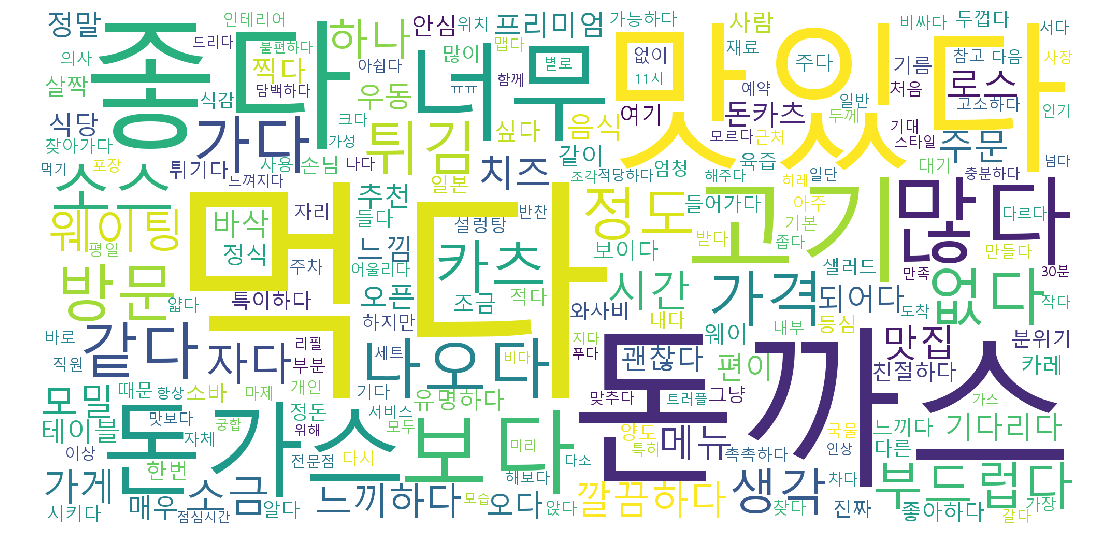

In [31]:
# 생성한 WordCloud 객체로부터 워드클라우드를 보여주는 코드입니다.

plt.figure(figsize=(15,15)) # 이 부분을 수정하시면 화면에서 보여지는 워드클라우드의 크기가 바뀝니다 
plt.imshow(word_cloud) # image show
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

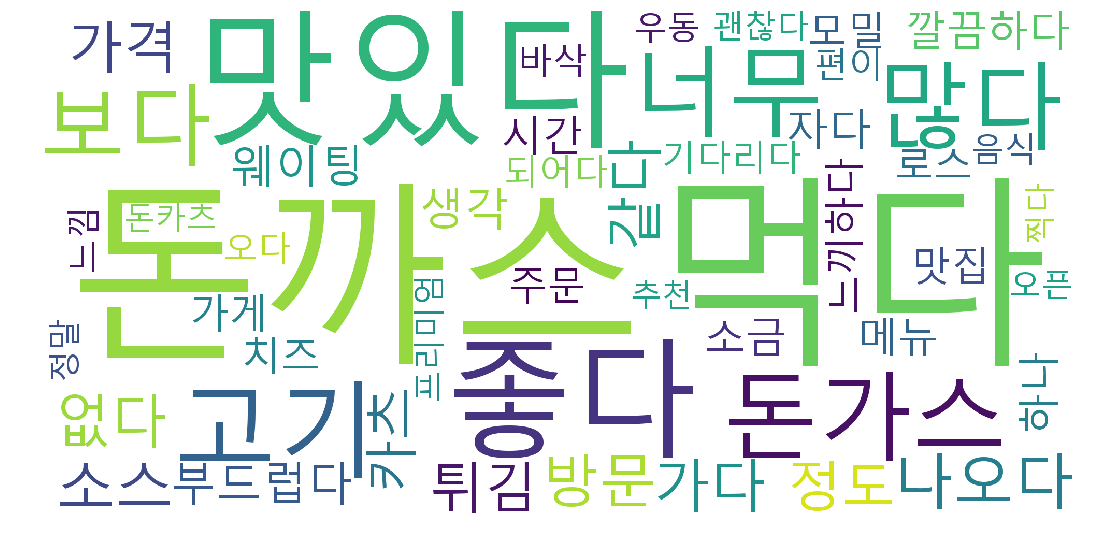

In [32]:
# max_words 라는 옵션을 통해 워드클라우드에 담길 단어의 최대 갯수를 제한할 수 있습니다.
# 기본적으로 옵션을 지정하지 않으면 200 으로 default 값이 지정되어 있습니다.

word_cloud = WordCloud(font_path="C:/Windows/Fonts/malgun.ttf", # font_path="C:/Windows/Fonts/NanumSquareB.ttf"
                       max_words=50, # max words
                       width=2000, height=1000, 
                       background_color='white').generate_from_frequencies(word_dic)


# 생성한 WordCloud 객체로부터 워드클라우드를 보여주는 코드입니다.

plt.figure(figsize=(15,15)) # 이 부분을 수정하시면 화면에서 보여지는 워드클라우드의 크기가 바뀝니다 
plt.imshow(word_cloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [36]:
from PIL import Image

youtube_coloring = np.array(Image.open("돈까스.jpg"))

youtube_coloring.shape

(225, 225, 3)

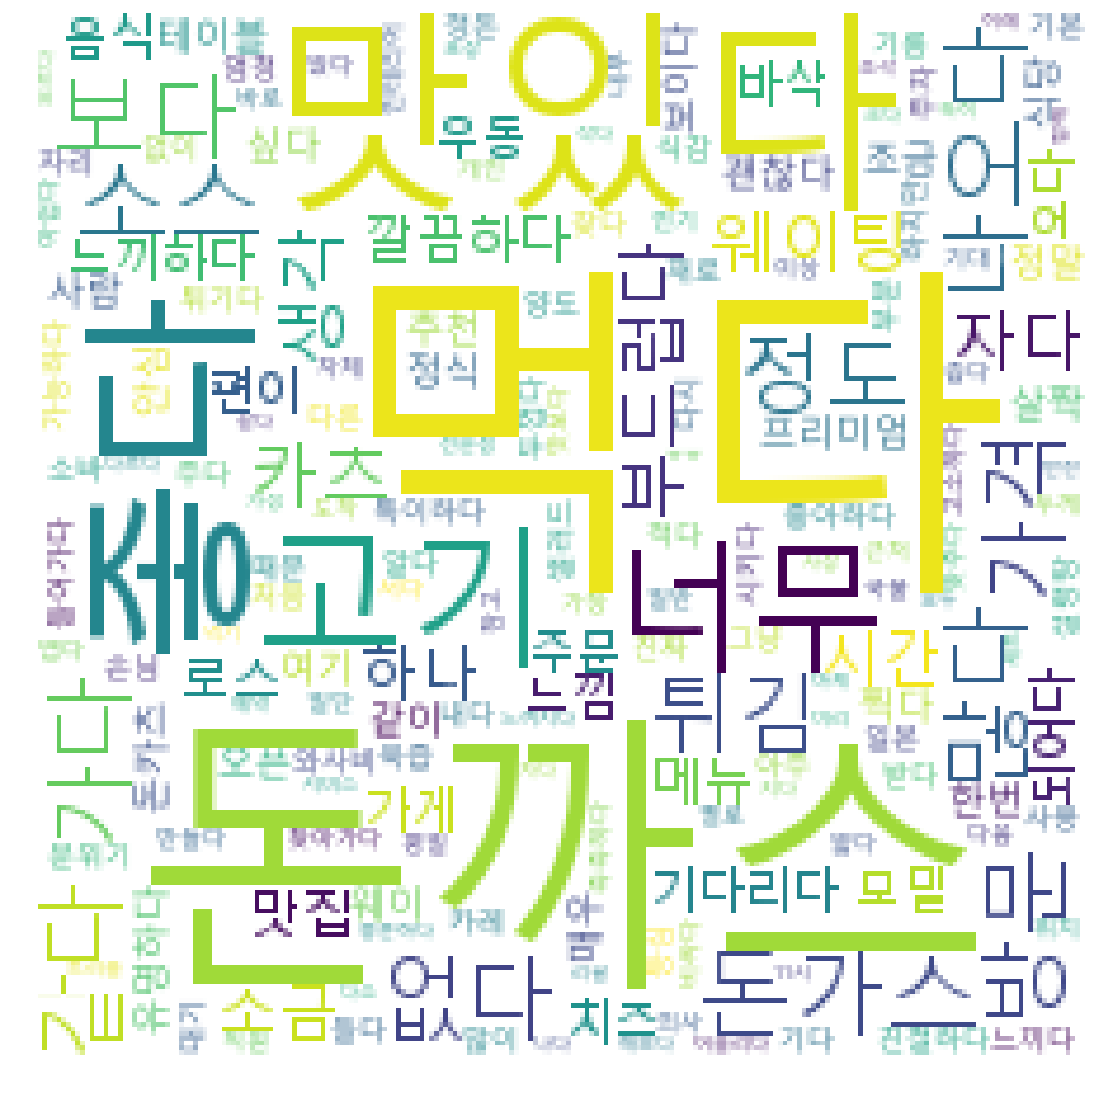

In [37]:
from PIL import Image

youtube_coloring = np.array(Image.open("돈까스.jpg"))

word_cloud = WordCloud(font_path="C:/Windows/Fonts/malgun.ttf", # font_path="C:/Windows/Fonts/NanumSquareB.ttf"
                       width=2000, height=1000, 
                       mask=youtube_coloring, # "마스크를 씌운다"라고 표현합니다. (masking)
                       background_color='white').generate_from_frequencies(word_dic)

plt.figure(figsize=(15,15))
plt.imshow(word_cloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()